In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [3]:
# Step 1: Read black and white image from URL
url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'  # You can change the image URL
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  # Grayscale = Black & White

In [4]:
# Step 2: Define and normalize the custom weighted filter
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)
kernel = kernel / kernel.sum()  # Normalize filter

In [5]:
# Step 3: Apply filter manually using convolution
def manual_convolution(image, kernel):
    m, n = kernel.shape
    pad_h, pad_w = m // 2, n // 2
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+m, j:j+n]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

manual_filtered = manual_convolution(img, kernel)

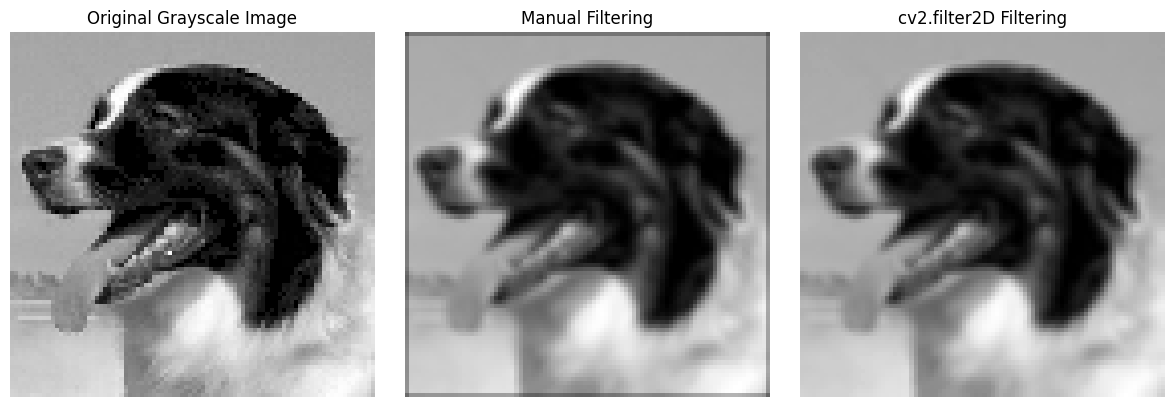

In [6]:
# Step 4: Apply filter using OpenCV's filter2D
opencv_filtered = cv2.filter2D(img, -1, kernel)

# Step 5: Show all 3 images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Manual Filtering")
plt.imshow(manual_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("cv2.filter2D Filtering")
plt.imshow(opencv_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()